<a href="https://colab.research.google.com/github/overtunned/Object-classification-using-cnn-motorcycle/blob/main/Object_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [3]:
!git clone https://github.com/overtunned/Object-classification-using-cnn-motorcycle.git

fatal: destination path 'Object-classification-using-cnn-motorcycle' already exists and is not an empty directory.


In [4]:
!ls Object-classification-using-cnn-motorcycle

1.mat	 media						       README
dataset  predict-image-category-from-256-categories-new.ipynb  README.md


In [5]:
import pandas as pd
import numpy as np
import os
from os import listdir
from glob import glob
import itertools
import fnmatch
import random
from PIL import Image
import zlib
import itertools
import csv
import math
from tqdm import tqdm
import matplotlib.pylab as plt
import seaborn as sns
import cv2
import skimage
from skimage import transform
from skimage.transform import resize
import scipy
from scipy import misc
import keras
from keras import backend as K
from keras import models, layers, optimizers
# from keras.applications.inception_v3 import InceptionV3
# from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import preprocess_input
from keras.models import Model, Sequential, model_from_json
from keras.layers import Dense, Dropout, Input, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D, Lambda, AveragePooling2D
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator,smart_resize
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.utils import class_weight
%matplotlib inline

In [6]:
#@title
# #@title
# import cv2
# import scipy.io as sio
# from os import listdir
# from os.path import isfile,join,isdir
# import numpy as np
# from matplotlib.path import Path
# import os

# """ Caltech-101 dataset has images belonging to 101 different Categories. The dataset also provides us with annotation 
# for each image which helps us to crop the foreground image and get rid of background in the image.

# In this file the foreground/area of intereset in the image is cropped by ignoring the background
#  and all the cropped out images are written to a folder and also values of each and every image is appended
#  in array and stored in .mat file in order to avoid converting image to array every time we run the program
# """
# def load_data_shared():

# # Navigate to  main directory in which there are 101 subdirectories containing images.
#     mypath = '/Users/manaswipodduturi/Documents/Research/MachineLearning/Data/Caltech/101_ObjectCategories'
# # Process all the folders in the main directory
#     folders = [folder for folder in listdir(mypath) if isdir(join(mypath,folder))]
#     all_images = np.array([])
#     all_labels = np.array([],dtype=np.uint8)
# # Process all the images in each and every folder in the main directory.
#     for j in xrange(0,len(folders)):
#       files = [file for file in listdir(join(mypath,folders[j])) if (isfile(join(mypath,folders[j],file)) & bool(file!='.DS_Store')) ]
#       images = np.empty(len(files),dtype=object)
#       labels = np.empty(len(files),dtype=np.uint8)
#   #Convert each and every image to array and append array values of all the images
#       for n in xrange(0,len(files)):
#           images[n] = cv2.imread(join(mypath,folders[j],files[n]))
#           labels.fill(j)
#       all_images = np.append(all_images,images)
#       all_labels = np.append(all_labels,labels)

# # Navigate to  main directory in which there are 101 subdirectories containing annotation of each image.
#     mypath = '/Users/manaswipodduturi/Documents/Research/MachineLearning/Data/Caltech/Annotations'
#     folders = [folder for folder in listdir(mypath) if isdir(join(mypath,folder))]
#     all_annotations = np.array([])
#     for j in xrange(0,len(folders)):
#         files = [file for file in listdir(join(mypath,folders[j])) if (isfile(join(mypath,folders[j],file)) & bool(file!='.DS_Store'))]
#         annotations = np.empty(len(files),dtype=object)
# # Get array of annotations for each image from .mat file and append annotations of all the images
#         for n in xrange(0,len(files)):
#             annotations[n] = sio.loadmat(join(mypath,folders[j],files[n]))
#         all_annotations = np.append(all_annotations,annotations)

# # Navigate to  directory where you want to write cropped images.
#     os.chdir('/Users/manaswipodduturi/Documents/Research/MachineLearning/Data/Caltech/processed_images1')
#     image_with_annotation = np.empty((all_images.shape[0],150*100),dtype=object)
#     for i in xrange(0,all_images.shape[0]):
#         image = all_images[i]
#         image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# # Contour is a rough coordinates, which help us find the area of interest in the image
#         contour = all_annotations[i]['obj_contour']
# #Box coordinates provides us with rough rectangular outline of our area of interest in the image
#         box = all_annotations[i]['box_coord']
#         contour = np.transpose(contour)
#         contour[:,0]=contour[:,0]+box[:,2]
#         contour[:,1]=contour[:,1]+box[:,0]
# # Outline/sketch the ares of interest in the image and find all the points inside that region
#         p= Path(contour[:-2])
#         mask = np.zeros((image.shape),dtype=np.uint8)
#         for y in xrange(box[0,0],box[0,1]+1):
#             for x in xrange(box[0,2],box[0,3]+1):
#                 bool_value = p.contains_point([x,y])
#                 if bool_value:
#                     mask[y-1,x-1]=1
#         image = image*mask
# #Write crooped out image to the subfolder
#         #cv2.imwrite('image'+str(i+1)+'.jpg',image)
# #append value of each image to an array
#         image = cv2.resize(image, (100,150))
#         image_with_annotation[i] = np.ravel(image)
#     sio.savemat('/Users/manaswipodduturi/Documents/Research/MachineLearning/NeuralNets/Caltech/caltech_data.mat',
#         {'features':image_with_annotation,
#          'labels' : all_labels})        

    



In [7]:
#@title
# import scipy.io as sio
# annot = sio.loadmat(path+'1.mat')
# coor = annot['SubDir_Data'].T
# print(coor[0,:])
# x1, y1 = int(coor[0,2]),int(coor[0,3])
# x2, y2 = int(coor[0,6]),int(coor[0,7])

In [8]:
#@title
# img = cv2.imread(path+'/1/0001.jpg')
# plt.imshow(img[y1:y2,x1:x2])

In [9]:
path ='Object-classification-using-cnn-motorcycle/dataset/'

In [10]:
def loadBatchImages(path):
    catList = listdir(path)
    loadedImagesTrain = []
    loadedLabelsTrain = []
    loadedImagesVal = []
    loadedLabelsVal = []
    for cat in catList:
        deepPath = path+cat+"/"
        imageList = listdir(deepPath)
        for images in imageList:                
            img = cv2.imread(deepPath + images)
            img = cv2.resize(img, (224,224))
            loadedLabelsTrain.append(int(cat))
            loadedImagesTrain.append(img)
    return loadedImagesTrain,to_categorical(loadedLabelsTrain)

In [11]:
def shuffledSet(a, b, test_proportion=0.2, val_proportion=0.2):
    assert np.shape(a)[0] == np.shape(b)[0]
    p = np.random.permutation(np.shape(a)[0])
    num_test = math.ceil(len(p)* test_proportion)
    num_val = math.ceil(len(p) * val_proportion)
    s1 = p[num_test + num_val:]
    s2 = p[num_test: num_test + num_val]
    s3 = p[0:num_test]
    return (a[s1], b[s1]), (a[s2], b[s2]), (a[s3], b[s3])

In [12]:
data, labels = loadBatchImages(path)

In [13]:
# data = preprocess_input(np.float64(data))
# dataVal = preprocess_input(np.float64(dataVal))
train, val, test = shuffledSet(np.asarray(data),labels,0.2,0.1)
# val = shuffledSet(np.asarray(dataVal),labelsVal)

In [14]:
# Split out features and labels
X_train, y_train = train[0], train[1]
X_val, y_val = val[0], val[1]
X_test, y_test = test[0],test[1]

In [15]:
#already 4 dimensional
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(1475, 224, 224, 3)
(422, 224, 224, 3)
(211, 224, 224, 3)


In [16]:
# STOP: Do not change the tests below. Your implementation should pass these tests.
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (224, 224, 3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (224, 224, 3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (224, 224, 3)), "The dimensions of the images are not 32 x 32 x 3."

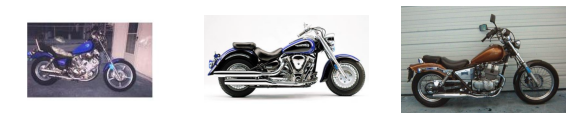

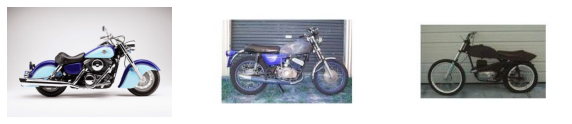

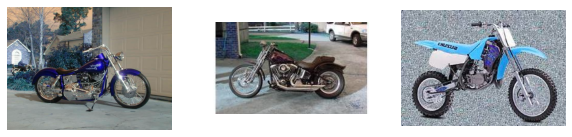

In [17]:
multipleImages = glob(path+'1/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(10,10))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
    plt.axis('off')
plotThreeImages(multipleImages)
plotThreeImages(multipleImages)
plotThreeImages(multipleImages)

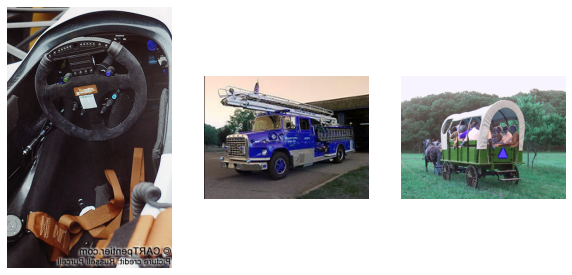

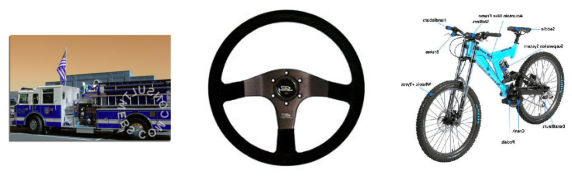

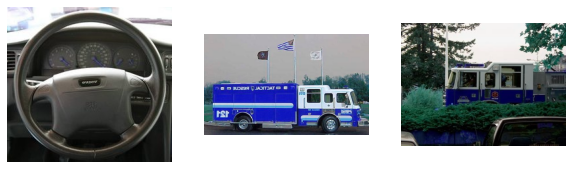

In [18]:
multipleImages = glob(path+'0/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(10,10))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
    plt.axis('off')
plotThreeImages(multipleImages)
plotThreeImages(multipleImages)
plotThreeImages(multipleImages)

[347, 1128]


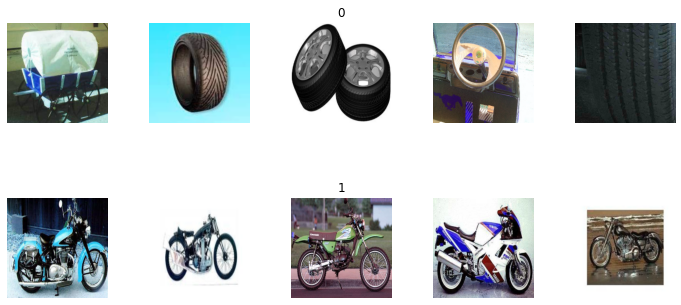

In [19]:
num_of_samples=[]
cols = 5
num_classes = 2
labels = [0,1]
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(10,5))
fig.tight_layout()
y_data = np.argmax(y_train , axis=-1)

for i in range(cols):
    for j in labels:
      x_selected = X_train[y_data == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))
print(num_of_samples)

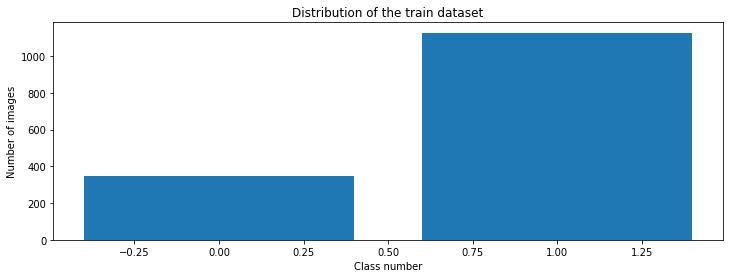

In [20]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [21]:
def preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

(1475, 224, 224)


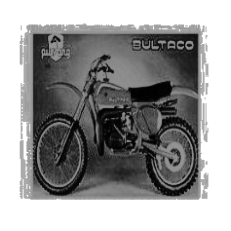

In [22]:
X_train1 = np.array(list(map(preprocess, X_train)))
X_test1 = np.array(list(map(preprocess, X_test)))
X_val1 = np.array(list(map(preprocess, X_val)))
 
plt.imshow(X_train1[random.randint(0, len(X_train1) - 1)], cmap=plt.get_cmap('gray'))
plt.axis('off')

print(X_train1.shape)

In [23]:
X_train = X_train1.reshape(1475, 224, 224, 1)
X_test = X_test1.reshape(422, 224, 224, 1)
X_val = X_val1.reshape(211, 224, 224, 1)

In [24]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)

datagen.fit(X_train)

(15, 224, 224, 1)


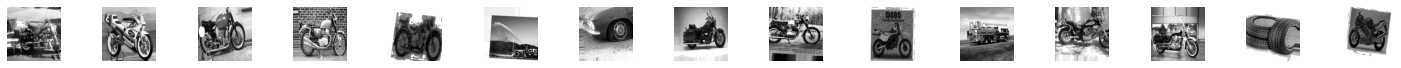

In [25]:

# for X_batch, y_batch in

batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(224, 224), cmap = plt.get_cmap('gray'))
    axs[i].axis("off")

print(X_batch.shape)

In [26]:
datagen.flow(X_train, y_train, batch_size=50)

In [27]:
# create model
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(224, 224, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(2, activation='softmax'))

  model.compile(Adam( learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = modified_model()
history = model.fit(X_train, 
                    y_train, 
                    batch_size=50,
                    epochs=10,
                    verbose = 1,
                    validation_data=(X_val, y_val), 
                    shuffle = 1)

Epoch 1/10
 2/30 [=>............................] - ETA: 17:25 - loss: 3.7867 - accuracy: 0.5650

Text(0.5, 0, 'epoch')

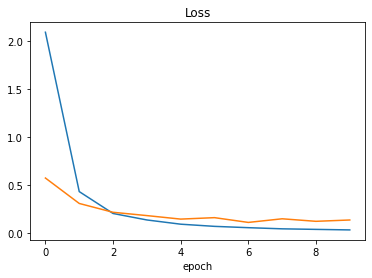

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

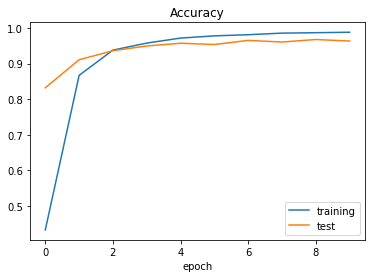

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [26]:

# TODO: Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.21815122663974762
Test accuracy: 0.947822630405426


In [1]:
#predict internet number
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)

print("predicted sign: "+ str(model.predict_classes(img)))

NameError: ignored